In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt').read().split()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {ch: i+1 for i, ch in enumerate(chars)}
stoi['.'] = 0
itos = {i: ch for ch, i in stoi.items()}
len(chars)
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [27]:
block_size = 3
X, Y = [], []
for word in words:
    # print(word)
    context = [0]* block_size
    for ch in word+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context),'--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
C = torch.randn(len(chars), 2)

In [7]:
emb = C[X]

In [8]:
W1 = torch.randn(6, 100)
B1 = torch.randn(100)

In [9]:
emb.shape

torch.Size([16, 3, 2])

In [10]:
emb.view(16,6).shape

torch.Size([16, 6])

In [11]:
h = emb.view(-1,6) @ W1 + B1
h.shape

torch.Size([16, 100])

In [12]:
h = torch.tanh(h)
h.shape

torch.Size([16, 100])

In [13]:
W2 = torch.randn(100, len(chars))
B2 = torch.randn(len(chars))

In [14]:
logits = h @ W2 + B2
logits.shape


torch.Size([16, 26])

In [15]:
counts = logits.exp()
prob = counts / counts.sum(-1, keepdim=True)
prob.shape

torch.Size([16, 26])

In [17]:
prob[torch.arange(16), Y]

tensor([1.9480e-08, 2.1927e-09, 1.8035e-06, 2.1173e-04, 1.2823e-07, 1.2902e-13,
        5.0989e-06, 1.3079e-13, 4.3284e-12, 8.3004e-14, 2.3871e-07, 8.7227e-08,
        1.3997e-05, 2.8030e-07, 4.6288e-07, 1.9554e-10])

In [18]:
loss = -prob[torch.arange(16), Y].log().mean()
loss

tensor(18.6107)

In [47]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [78]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn(len(chars)+1, 2, generator=g, requires_grad=True)
W1 = torch.randn(6, 100, generator=g, requires_grad=True)
B1 = torch.randn(100, generator=g, requires_grad=True)
W2 = torch.randn(100, len(chars)+1, generator=g, requires_grad=True)
B2 = torch.randn(len(chars)+1, generator=g, requires_grad=True)

In [79]:
# lr =torch.linspace(-3,0,steps=1000)
# lr = 10**lr

In [84]:
# Arrange everything into a function
parameters = [C, W1, B1, W2, B2]
# lreees = []
# lresss = []
def compute_loss(X, Y, i):
    ix = torch.randint(0,X.shape[0], (32,))
    emb = C[X[ix]]
    h = emb.view(-1,6) @ W1 + B1
    h = torch.tanh(h)
    logits = h @ W2 + B2
    # counts = logits.exp()
    # prob = counts / counts.sum(-1, keepdim=True)
    # return -prob[torch.arange(len(X)), Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix])
    # print(f'Loss for {i+1}th : {loss.item()}')
    # backward pass
    for p in parameters:
        if p.grad is not None:
            p.grad.zero_()
    loss.backward()
    # lre = lr[i]
    lre = 0.01
    for p in parameters:
        p.data -= p.grad * lre
    
    # lreees.append(lre)
    # lresss.append(loss.item())
    
    return loss.item()



In [86]:
for i in range(100000):
    loss = compute_loss(X, Y, i)
print(loss)

2.2202165126800537


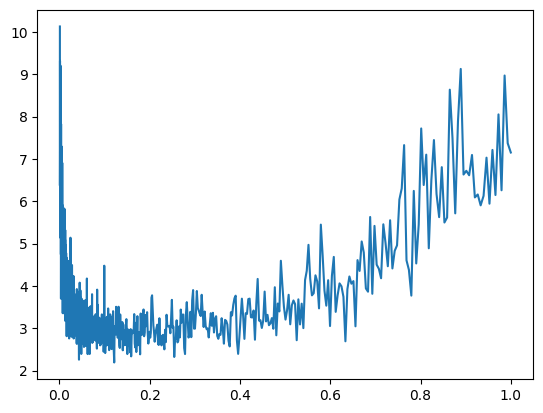

In [77]:
# plt.plot(lreees, lresss)

In [87]:
emb = C[X]
h = emb.view(-1,6) @ W1 + B1
h = torch.tanh(h)
logits = h @ W2 + B2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.4064, grad_fn=<NllLossBackward0>)